# Topic: Mall Customer Segmentation Data

# Taks: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history eda part

# Step1 : import Required Libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd()

'C:\\Users\\user'

# Step2: Load the Dataset

In [5]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Step3 : Data Overview

In [ ]:
# check the first few rows the structure and the sumary to get a feel for the data set 

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# basic information
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
# summary Statistics
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


# Step 4: Check for missing valuse

In [11]:
# check for missing valuse
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Step 5: EDA- Visualize the data

In [ ]:
# 1) Distribution of Age, Income, and Spending Score:
#Plot histograms to understand the distributions.
#2) Gender Distribution : understand the breakdown by gender(if gender is present)

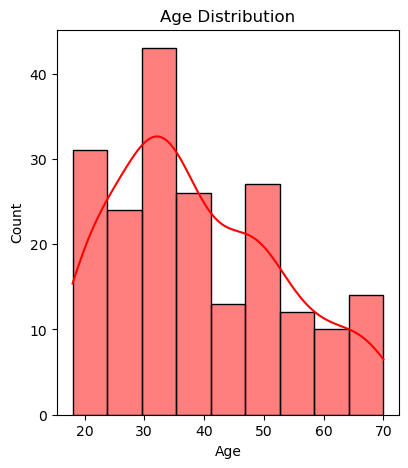

In [15]:
# Histograms
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data["Age"],kde=True,color="red")
plt.title("Age Distribution")
plt.show()

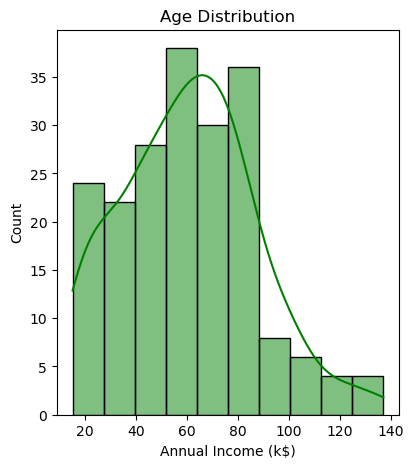

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title("Age Distribution")
plt.show()

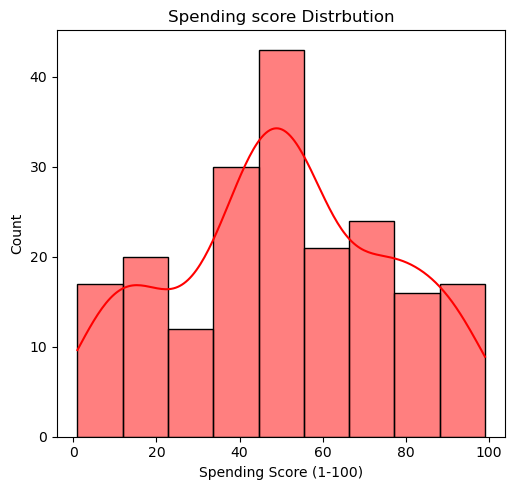

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title("Spending score Distrbution")
plt.tight_layout()
plt.show()

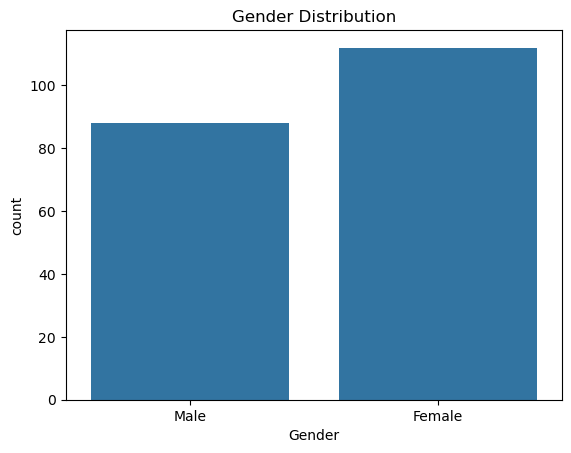

In [27]:
# Gender Distribution (if present)
if 'Gender' in data.columns:
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution')
    plt.show()

# Step 6 : Feature selection 

In [29]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 7: Scale the Features (Optional but Recommended)

In [ ]:
# Scaling helps K-means perform better if the feature scales are vastly different.

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Use the Elbow Method to Determine Optimal Number of Clusters

In [ ]:
#The elbow method helps find the optimal number of clusters by plotting the 
# sum of squared distances (inertia) for each number of clusters.

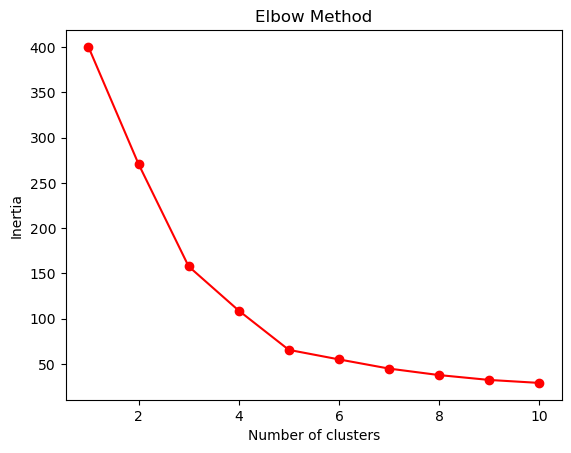

In [32]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o',color="red")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 9: Apply K-means Clustering 

In [33]:
# Fit K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Step 10: Visualize the Clusters

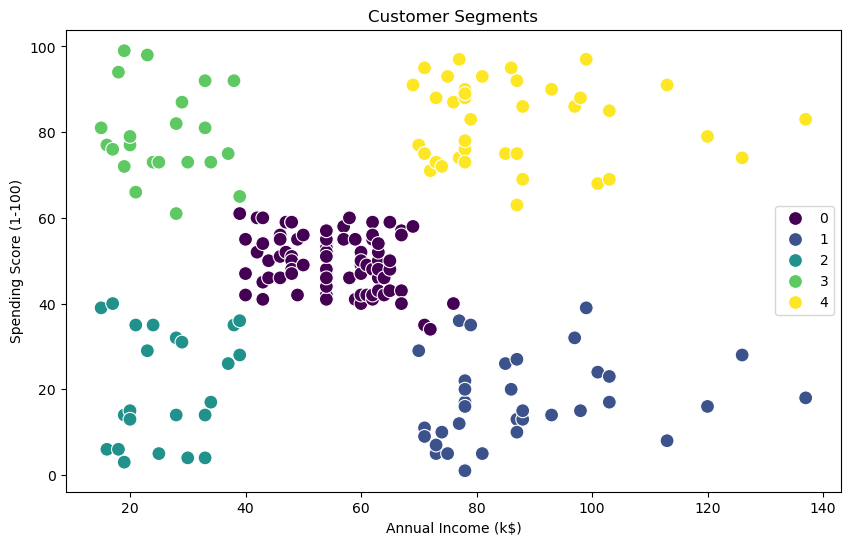

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# concusion

In [ ]:
#The K-means clustering model identified distinct customer groups that can guide marketing strategies. 
#This segmentation allows for targeted approaches, increasing customer engagement and driving profitability for the retail store.